In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bostonhouse.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

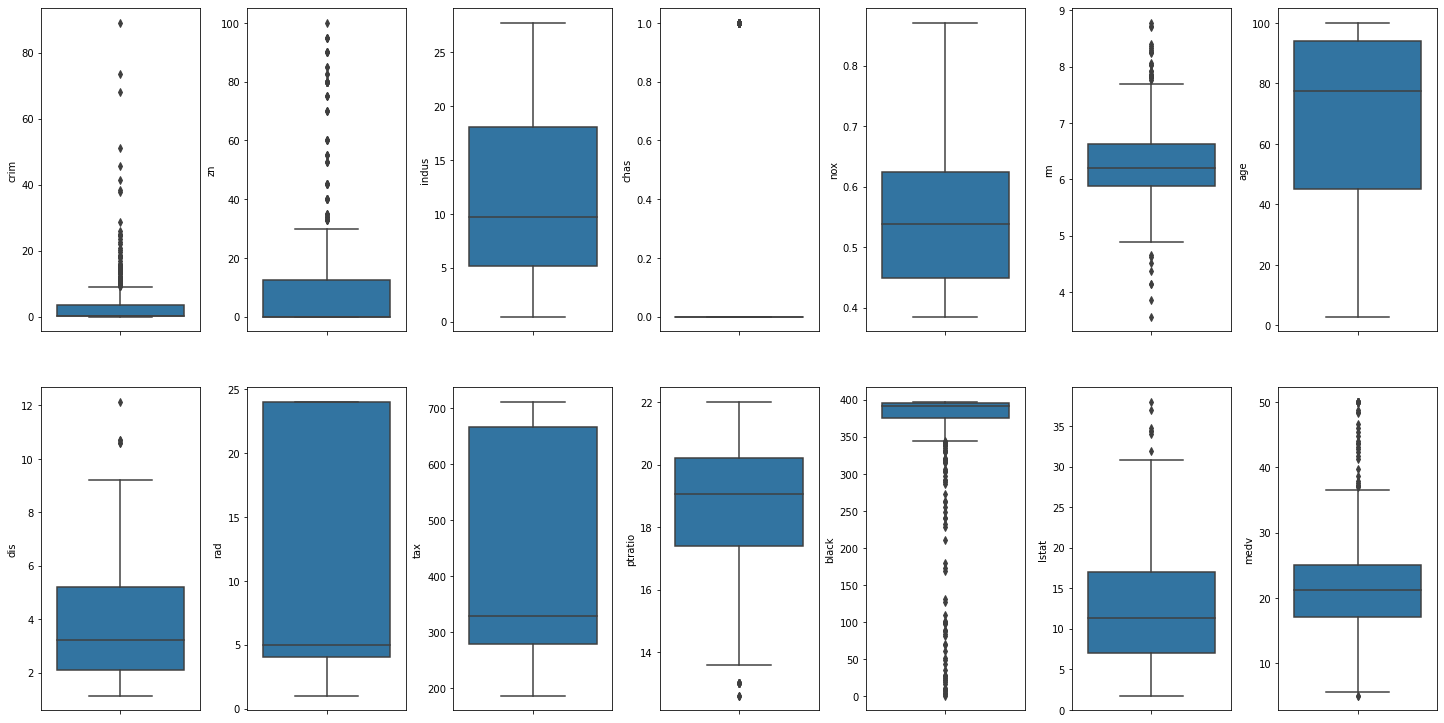

In [6]:
figure, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
i = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[i])
    i+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

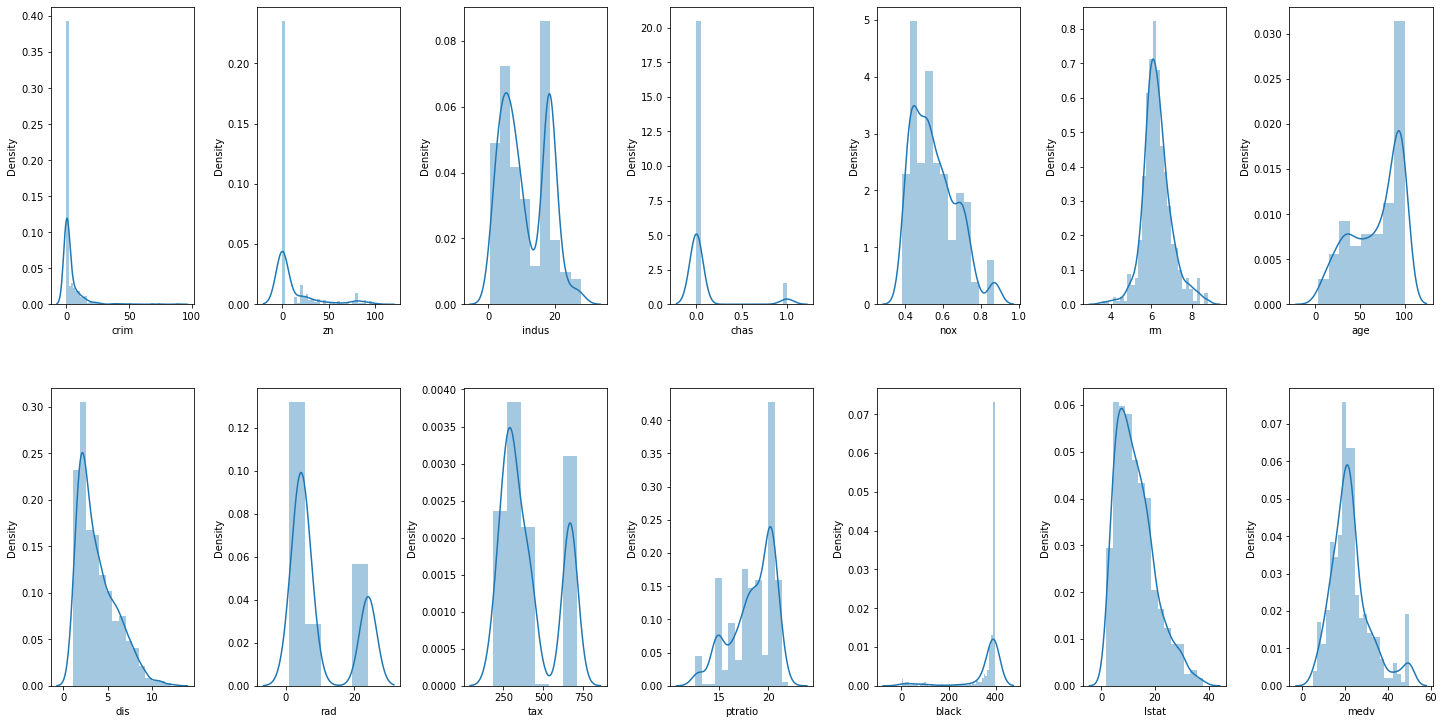

In [7]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
i = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[i])
    i += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [8]:


for i in df:
    per25=df[i].quantile(0.25)
    per75=df[i].quantile(0.75)

    iqr=per75-per25

    u=per75+1.5*iqr
    l=per25-1.5*iqr

    df[i]=np.where(
    df[i] > u,
    u,
    np.where(
    df[i]<l,
    l,
    df[i]
    ))



    
    

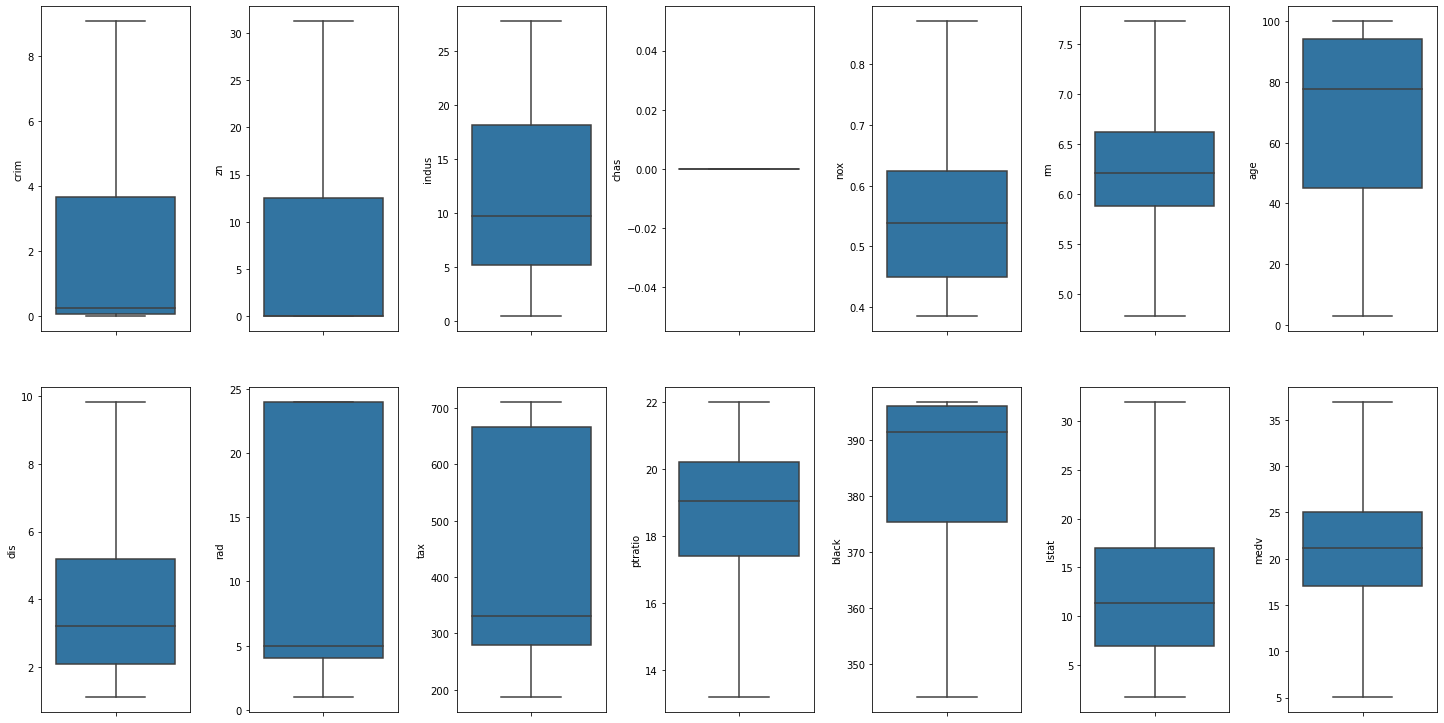

In [9]:
figure, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
j = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[j])
    j+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

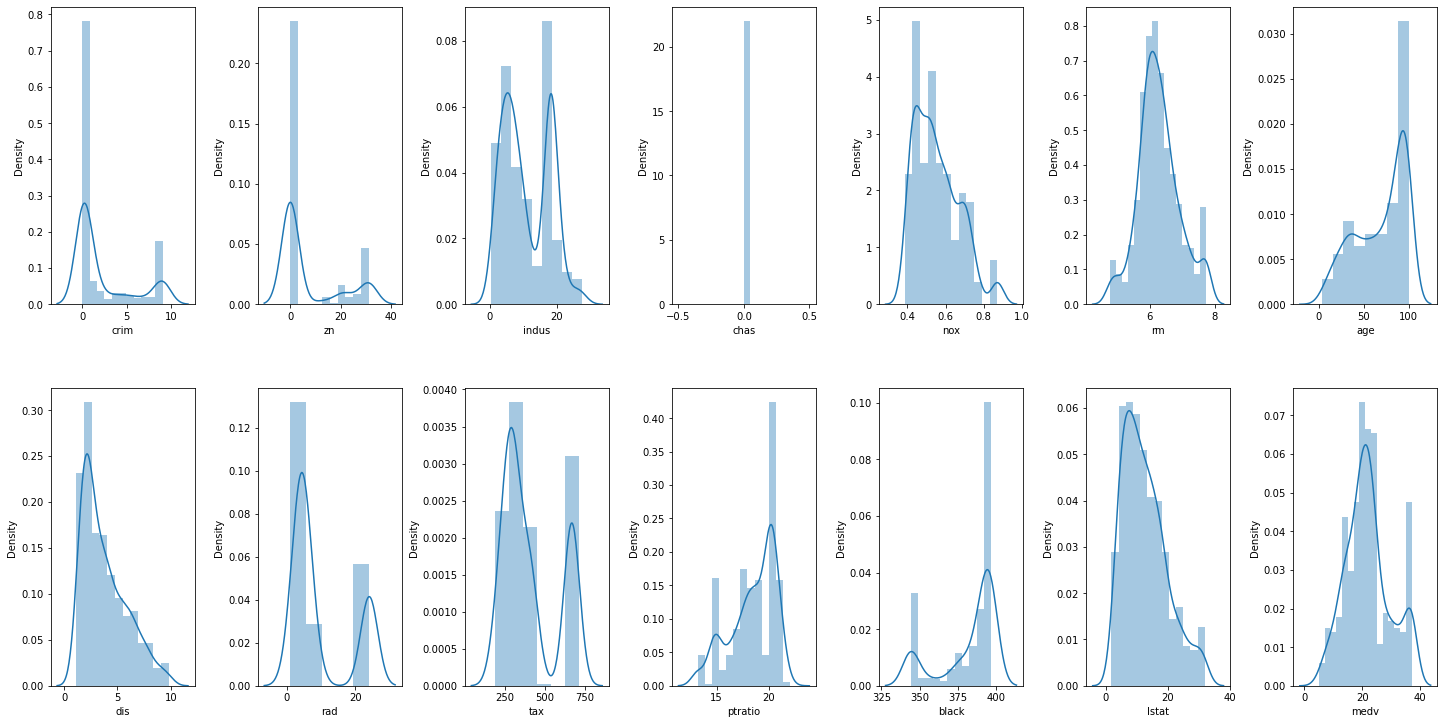

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
j = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[j])
    j += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

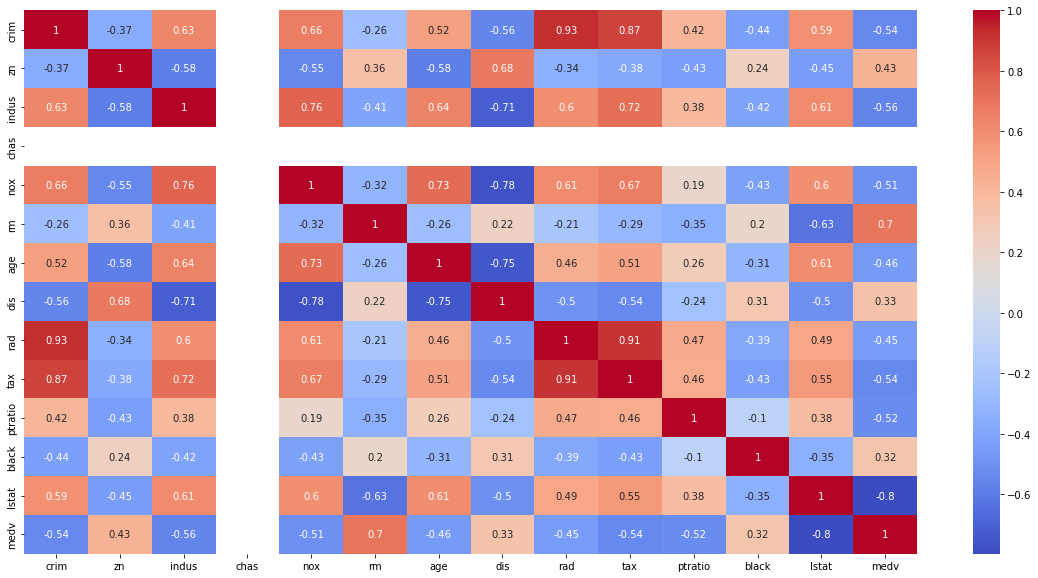

In [11]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [12]:
X = df.drop(columns=['medv'], axis=1)
y = df['medv']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
    
    
    # predict the training set
   
    
   
    
    
    #print('CV Score:', cv_score)

<AxesSubplot:>

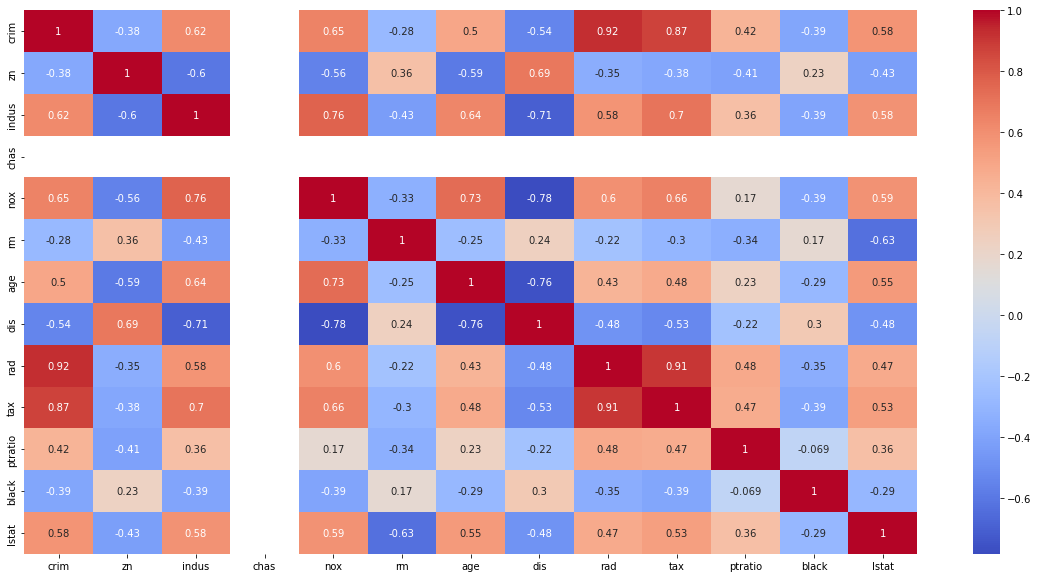

In [14]:
corr = x_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [15]:
def correlation(dataset,t):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>t:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_f=correlation(x_train,0.7)
len(set(corr_f))

4

In [17]:
#here we get the columns

In [18]:
corr_f

{'age', 'nox', 'rad', 'tax'}

In [19]:
x_train=x_train.drop(columns={'age','rad'})

In [20]:
x_train

,crim,zn,indus,chas,nox,rm,dis,tax,ptratio,black,lstat
5,0.029850,0.00,2.18,0.0,0.458,6.430,6.0622,222.0,18.7,394.12000,5.21
116,0.131580,0.00,10.01,0.0,0.547,6.176,2.7301,432.0,17.8,393.30000,12.04
45,0.171420,0.00,6.91,0.0,0.448,5.682,5.1004,233.0,17.9,396.90000,10.21
16,1.053930,0.00,8.14,0.0,0.538,5.935,4.4986,307.0,21.0,386.85000,6.58
468,9.069639,0.00,18.10,0.0,0.580,5.926,2.9084,666.0,20.2,368.74000,18.13
...,...,...,...,...,...,...,...,...,...,...,...
106,0.171200,0.00,8.56,0.0,0.520,5.836,2.2110,384.0,20.9,395.67000,18.66
270,0.299160,20.00,6.96,0.0,0.464,5.856,4.4290,223.0,18.6,388.65000,13.00
348,0.015010,31.25,2.01,0.0,0.435,6.635,8.3440,280.0,17.0,390.94000,5.99
435,9.069639,0.00,18.10,0.0,0.740,6.629,2.1247,666.0,20.2,344.10625,23.27


In [21]:
x_test=x_test.drop(columns={'age','rad'})

In [22]:
x_test

,crim,zn,indus,chas,nox,rm,dis,tax,ptratio,black,lstat
173,0.091780,0.00,4.05,0.0,0.510,6.4160,2.6463,296.0,16.6,395.50000,9.04
274,0.056440,31.25,6.41,0.0,0.447,6.7580,4.0776,254.0,17.6,396.90000,3.53
491,0.105740,0.00,27.74,0.0,0.609,5.9830,1.8681,711.0,20.1,390.11000,18.07
72,0.091640,0.00,10.81,0.0,0.413,6.0650,5.2873,305.0,19.2,390.91000,5.52
452,5.090170,0.00,18.10,0.0,0.713,6.2970,2.3682,666.0,20.2,385.09000,17.27
...,...,...,...,...,...,...,...,...,...,...,...
441,9.069639,0.00,18.10,0.0,0.740,6.4060,2.0651,666.0,20.2,385.96000,19.52
23,0.988430,0.00,8.14,0.0,0.538,5.8130,4.0952,307.0,21.0,394.54000,19.88
225,0.526930,0.00,6.20,0.0,0.504,7.7305,2.8944,307.0,17.4,382.00000,4.63
433,5.581070,0.00,18.10,0.0,0.713,6.4360,2.3158,666.0,20.2,344.10625,16.22


KeyError: 'age'

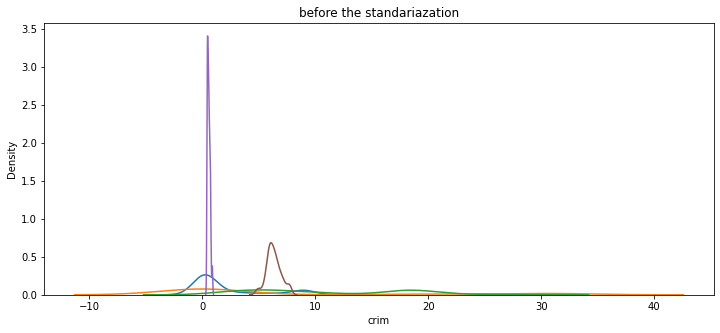

In [23]:
fig, (ax1)=plt.subplots(ncols=1,figsize=(12,5))
ax1.set_title('before the standariazation')
for i in df.columns:
    sns.kdeplot(x_train[i],ax=ax1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_s=scaler.fit_transform(x_train)
x_test_s=scaler.fit_transform(x_test)

In [25]:
x_train_s

array([[-0.6618166 , -0.59822673, -1.29214218, ...,  0.18443366,
         0.62325696, -1.02671247],
       [-0.63080433, -0.59822673, -0.16208345, ..., -0.21969677,
         0.57942789, -0.04915349],
       [-0.61865916, -0.59822673, -0.60948856, ..., -0.17479339,
         0.77184822, -0.31107632],
       ...,
       [-0.66634055,  1.96709285, -1.3166773 , ..., -0.57892382,
         0.45328567, -0.91507323],
       [ 2.09395177, -0.59822673,  1.00549958, ...,  0.85798439,
        -2.04998264,  1.55816531],
       [-0.60117913, -0.59822673, -0.37135358, ...,  1.17230806,
        -2.04998264, -0.25096288]])

In [26]:
x_test_s

array([[-0.64826506, -0.53576029, -1.06299571, ..., -1.21632742,
         0.75257116, -0.58344993],
       [-0.65872779,  2.16078159, -0.70943587, ..., -0.68059353,
         0.82356726, -1.36671391],
       [-0.64413208, -0.53576029,  2.48608589, ...,  0.65874122,
         0.47923618,  0.70019322],
       ...,
       [-0.51943494, -0.53576029, -0.74089671, ..., -0.78774031,
         0.06796592, -1.21034542],
       [ 0.97688922, -0.53576029,  1.04188384, ...,  0.71231461,
        -1.85368296,  0.43720985],
       [ 2.00971176, -0.53576029,  1.04188384, ...,  0.71231461,
         0.3986049 ,  0.46848355]])

In [27]:
x_train_s=pd.DataFrame(x_train_s,columns=x_train.columns)
x_test_s=pd.DataFrame(x_test_s,columns=x_test.columns)

In [28]:
x_train_s

,crim,zn,indus,chas,nox,rm,dis,tax,ptratio,black,lstat
0,-0.661817,-0.598227,-1.292142,0.0,-0.851085,0.182475,1.106019,-1.112790,0.184434,0.623257,-1.026712
1,-0.630804,-0.598227,-0.162083,0.0,-0.087967,-0.212052,-0.491097,0.150088,-0.219697,0.579428,-0.049153
2,-0.618659,-0.598227,-0.609489,0.0,-0.936828,-0.979361,0.645017,-1.046639,-0.174793,0.771848,-0.311076
3,-0.349627,-0.598227,-0.431970,0.0,-0.165136,-0.586387,0.356566,-0.601625,1.217211,0.234675,-0.830628
4,2.093952,-0.598227,1.005500,0.0,0.194987,-0.600367,-0.405636,1.557294,0.857984,-0.733306,0.822491
...,...,...,...,...,...,...,...,...,...,...,...
349,-0.618726,-0.598227,-0.371354,0.0,-0.319475,-0.740160,-0.739908,-0.138570,1.172308,0.706105,0.898349
350,-0.579718,1.043578,-0.602272,0.0,-0.799639,-0.709095,0.323206,-1.106776,0.139530,0.330885,0.088249
351,-0.666341,1.967093,-1.316677,0.0,-1.048295,0.500892,2.199714,-0.763995,-0.578924,0.453286,-0.915073
352,2.093952,-0.598227,1.005500,0.0,1.566884,0.491573,-0.781273,1.557294,0.857984,-2.049983,1.558165


In [29]:
x_test_s

,crim,zn,indus,chas,nox,rm,dis,tax,ptratio,black,lstat
0,-0.648265,-0.535760,-1.062996,0.0,-0.341167,0.387844,-0.596310,-0.664493,-1.216327,0.752571,-0.583450
1,-0.658728,2.160782,-0.709436,0.0,-0.896224,0.971284,0.111523,-0.907136,-0.680594,0.823567,-1.366714
2,-0.644132,-0.535760,2.486086,0.0,0.531066,-0.350840,-0.981160,1.733048,0.658741,0.479236,0.700193
3,-0.648307,-0.535760,-0.050257,0.0,-1.195779,-0.210951,0.709766,-0.612498,0.176581,0.519805,-1.083829
4,0.831554,-0.535760,1.041884,0.0,1.447351,0.184834,-0.733841,1.473074,0.712315,0.224664,0.586471
...,...,...,...,...,...,...,...,...,...,...,...
147,2.009712,-0.535760,1.041884,0.0,1.685233,0.370784,-0.883736,1.473074,0.712315,0.268783,0.906315
148,-0.382804,-0.535760,-0.450259,0.0,-0.094475,-0.640854,0.120227,-0.600944,1.140902,0.703888,0.957490
149,-0.519435,-0.535760,-0.740897,0.0,-0.394029,2.630337,-0.473615,-0.600944,-0.787740,0.067966,-1.210345
150,0.976889,-0.535760,1.041884,0.0,1.447351,0.421963,-0.759755,1.473074,0.712315,-1.853683,0.437210


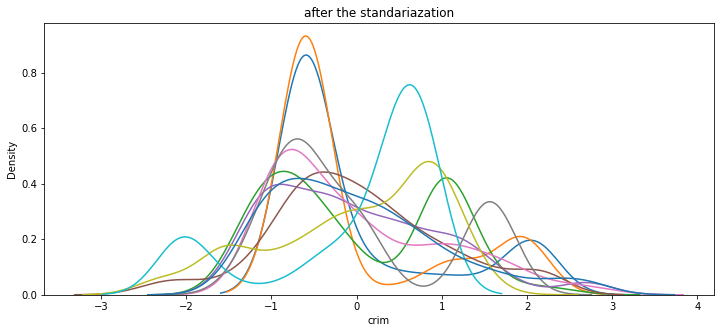

In [30]:
fig, (ax2)=plt.subplots(ncols=1,figsize=(12,5))
ax2.set_title('after the standariazation')
for j in x_train_s.columns:
    sns.kdeplot(x_train_s[j],ax=ax2)

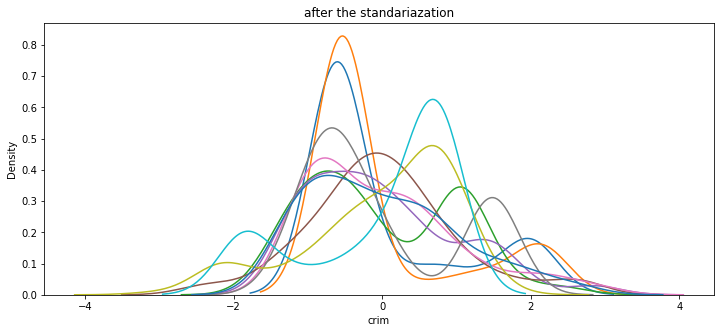

In [31]:
fig, (ax3)=plt.subplots(ncols=1,figsize=(12,5))
ax3.set_title('after the standariazation')
for k in x_test_s.columns:
    sns.kdeplot(x_test_s[k],ax=ax3)

In [32]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("Model Report")
print("MSE:",mean_squared_error(y_test, pred))

Model Report
MSE: 14.73644222861842


In [33]:
print(pred)

[24.4    28.7    18.9    21.2    17.7    18.5    19.4    13.3    23.
 21.2    18.3    27.1     8.8    19.3    18.7    20.2    20.5    10.5
 36.9625 14.6    24.7    25.     13.2    22.     16.7    17.4    22.
 14.1    23.1    20.     20.3    23.1    31.     16.2    10.2    16.8
 36.5    19.     22.5    25.     13.6    29.9    36.9625 16.1    20.6
 13.8    15.6    26.4    14.6    24.5    22.9    33.1    23.2    27.5
 36.9625 18.5    15.4    32.     20.6    17.5    28.6    32.7    25.1
 16.2    29.8    23.7    13.8    22.9    32.     14.1    20.7    36.9625
 11.8    19.6    21.7     6.3    20.4    36.9625 13.3     8.1    20.4
 11.9    23.4     7.4    20.3    25.1    14.9    23.     22.9    18.
 24.      7.5    19.2    19.3    11.9    18.6    36.9625 11.9    15.4
 10.2    19.3    28.1    13.3    21.7    23.4    13.3    16.2    23.
 18.6    22.      8.4    16.3    22.9    28.7    36.5    14.9    36.9625
 14.8    16.2    23.7    16.1    24.1     8.3    20.3    26.4    20.4
 24.1    34.9    1

In [45]:
pred_train=model.predict(x_train)
pred_train

array([22.96389654, 21.10657574, 22.74491852, 21.27704536, 22.59436201,
       22.75448424, 22.98094651, 23.02389854, 23.61448917, 21.85600621,
       21.04526112, 21.78645298, 22.08195238, 21.08507093, 21.9511094 ,
       22.88745793, 20.98663737, 21.53096663, 23.88099229, 21.09689587,
       21.89530952, 20.13698639, 23.24469413, 19.58259325, 20.9729727 ,
       21.51811645, 21.05563655, 23.01610247, 21.11632609, 23.32797588,
       23.33047666, 22.83543368, 22.34382189, 21.40538912, 21.90811869,
       21.20799646, 22.77575519, 21.28197154, 22.09541989, 19.51838715,
       21.10362023, 23.33281766, 23.33004144, 22.14395936, 21.3383256 ,
       20.9763285 , 21.90819719, 19.49869578, 22.06829439, 19.51650151,
       21.36920834, 23.0628439 , 21.79086381, 20.79504253, 19.51958478,
       20.89715532, 21.24559505, 20.98194632, 21.08836875, 21.57982669,
       21.90805356, 21.43145347, 21.05183114, 21.86301625, 21.08382818,
       23.23442307, 23.19276325, 23.33161339, 21.02259888, 21.98

In [48]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
print(mean_squared_error(y_test,pred))
print(mean_squared_error(y_train,pred_train))

51.089338980565365
62.06101019047192


In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train_s, y_train)

prednew = model.predict(x_test_s)

print("Model Report new")
print("MSE:",mean_squared_error(y_test, prednew))

Model Report new
MSE: 14.380088404605265


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("Model Report")
print("MSE:",mean_squared_error(y_test, pred))

Model Report
MSE: 13.295163316570285


In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_s, y_train)

prednew1 = model.predict(x_test_s)

print("Model Report")
print("MSE:",mean_squared_error(y_test, prednew1))

Model Report
MSE: 15.60746566071758


In [37]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=100)
model1.fit(x_train, y_train)

pred1 = model1.predict(x_test)

print("Model Report")
print("MSE:",mean_squared_error(y_test, pred1))#it has very low error means after removing features we got value but the standarization has not worked properly

Model Report
MSE: 7.985885021792768


In [49]:
pred_train_randomforest=model.predict(x_train)
pred_train_randomforest

array([22.96389654, 21.10657574, 22.74491852, 21.27704536, 22.59436201,
       22.75448424, 22.98094651, 23.02389854, 23.61448917, 21.85600621,
       21.04526112, 21.78645298, 22.08195238, 21.08507093, 21.9511094 ,
       22.88745793, 20.98663737, 21.53096663, 23.88099229, 21.09689587,
       21.89530952, 20.13698639, 23.24469413, 19.58259325, 20.9729727 ,
       21.51811645, 21.05563655, 23.01610247, 21.11632609, 23.32797588,
       23.33047666, 22.83543368, 22.34382189, 21.40538912, 21.90811869,
       21.20799646, 22.77575519, 21.28197154, 22.09541989, 19.51838715,
       21.10362023, 23.33281766, 23.33004144, 22.14395936, 21.3383256 ,
       20.9763285 , 21.90819719, 19.49869578, 22.06829439, 19.51650151,
       21.36920834, 23.0628439 , 21.79086381, 20.79504253, 19.51958478,
       20.89715532, 21.24559505, 20.98194632, 21.08836875, 21.57982669,
       21.90805356, 21.43145347, 21.05183114, 21.86301625, 21.08382818,
       23.23442307, 23.19276325, 23.33161339, 21.02259888, 21.98

In [51]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred1))
print(mean_absolute_error(y_train,pred_train_randomforest))

1.9954868421052623
6.116783585003839


In [38]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=10)
model2.fit(x_train_s, y_train)

pred2 = model2.predict(x_test_s)

print("Model Report")
print("MSE:",mean_squared_error(y_test, pred2))

Model Report
MSE: 9.760912890625002


In [53]:
pred_train_randomforestscaled=model2.predict(x_train_s)
pred_train_randomforestscaled

array([26.34   , 21.07   , 18.75   , 23.24   , 16.87   , 28.58875,
       34.0325 ,  5.40625, 26.1    , 18.54   , 21.26   , 23.08   ,
       22.04   , 21.27   , 36.64625, 14.61   , 16.85   , 23.75   ,
       20.81   , 20.12   , 21.16   , 36.9625 , 20.44   , 19.43   ,
       19.62   , 28.89   , 36.08   , 25.15   , 12.72   , 12.97   ,
       10.76625, 17.61   , 31.93   , 27.01   , 13.92   , 13.75   ,
       32.8475 , 22.27   , 20.18   , 22.73   , 18.38   , 12.35   ,
        6.07   , 31.01625, 26.52   , 19.38   , 16.17   , 13.84   ,
       22.93   , 16.16   , 27.17   , 35.13   , 23.28   , 24.89   ,
       23.43   , 36.9625 , 33.75   , 31.68   , 23.48   , 22.77   ,
       14.67   , 34.90125, 20.31   , 32.19   , 25.32   , 19.57   ,
       21.27   , 10.56   , 36.9625 , 36.64625, 32.35625,  9.66   ,
       17.16   , 20.84   , 33.64   , 14.99   , 33.19375, 20.71   ,
       22.96   , 12.52   , 20.49   , 24.48   , 29.1    , 28.26   ,
       22.88   , 26.06625, 26.8925 , 33.44   , 24.28   , 21.45

In [54]:
print(mean_absolute_error(y_test,pred2))
print(mean_absolute_error(y_train,pred_train_randomforestscaled))

2.2962500000000006
0.8496680790960456


In [39]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("Model Report")
print("MSE:",mean_squared_error(y_test, pred))

Model Report
MSE: 15.43660842549244


In [40]:
from sklearn.svm import SVR
model = SVR(kernel='sigmoid')
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("Model Report")
print("MSE:",mean_squared_error(y_test, pred))

Model Report
MSE: 51.089338980565365


In [41]:
x=np.array([0.00632,18.0,2.31,0,0.538,6.575,4.0900,296,15.3,396.90,4.98])
y=model1.predict(x.reshape(1,-1))
y#before this we got more closer values means after removing features error increased

array([27.652625])

In [42]:
from sklearn.neighbors import KNeighborsRegressor
neig = KNeighborsRegressor(n_neighbors=3)
neig.fit(x_train, y_train)
predl=neig.predict(x_test)
print("Model Report")
print("MSE:",mean_squared_error(y_test, predl))

Model Report
MSE: 17.17045207419591


In [55]:
predlknearest=neig.predict(x_train)
predlknearest

array([32.76666667, 21.1       , 21.13333333, 28.3875    , 16.26666667,
       32.975     , 32.76666667, 10.32083333, 30.9875    , 20.16666667,
       20.26666667, 22.76666667, 29.2       , 18.6       , 36.80833333,
       18.53333333, 20.63333333, 21.66666667, 19.5       , 20.26666667,
       21.53333333, 32.40833333, 20.86666667, 18.1       , 19.66666667,
       27.96666667, 32.96666667, 26.76666667, 13.6       , 11.66666667,
       12.23333333, 16.73333333, 32.76666667, 26.43333333, 14.4       ,
       15.16666667, 32.975     , 21.9       , 17.3       , 23.3       ,
       21.06666667, 12.3       ,  9.46666667, 32.46666667, 29.15416667,
       20.2       , 12.6       , 14.93333333, 25.96666667, 19.56666667,
       26.43333333, 32.63333333, 23.36666667, 23.26666667, 23.7       ,
       32.20833333, 33.93333333, 35.20833333, 23.26666667, 22.9       ,
       16.        , 29.15416667, 19.66666667, 29.8       , 25.9       ,
       21.53333333, 20.66666667,  9.        , 35.20833333, 36.80

In [56]:
print(mean_absolute_error(y_test,predl))
print(mean_absolute_error(y_train,predlknearest))

3.160745614035088
2.1775659133709984


In [43]:
from sklearn.neighbors import KNeighborsRegressor
neig1 = KNeighborsRegressor(n_neighbors=3)
neig1.fit(x_train_s, y_train)
predl1=neig1.predict(x_test_s)
print("Model Report")
print("MSE:",mean_squared_error(y_test, predl1))

Model Report
MSE: 10.843006556103804


In [63]:
predlknearestscaled=neig.predict(x_train_s)
predlknearestscaled

array([19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23333333,
       19.23333333, 19.23333333, 19.23333333, 19.23333333, 19.23

In [64]:
print(mean_absolute_error(y_test,predl1))
print(mean_absolute_error(y_train,predlknearestscaled))

2.4708607456140355
6.421798493408663


In [ ]:
#good behaviour the model only

In [65]:
x=np.array([0.00632,18.0,2.31,0,0.538,6.575,4.0900,296,15.3,396.90,4.98])
y=neig1.predict(x.reshape(1,-1))
y

array([16.2])

In [ ]:
#doing mean absolute error we do not got any overfitting means model is behaving well on every algorithm